In [1]:
%tensorflow_version 2.x  # line for colab

import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(777)

print(tf.__version__)
print(keras.__version__)

TensorFlow 2.x selected.
2.1.0
2.2.4-tf


Using TensorFlow backend.


## Load dataset

In [2]:
(train_data, train_labels), (test_data, test_labels)= imdb.load_data(num_words=10000)

print(train_data[0][:10])
print(train_labels[0])
print(max([ max(seq) for seq in train_data ]))  # largest index == 9999

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
1
9999


In [3]:
# decoding one sample review
word_index = imdb.get_word_index()
reverse_word_index = { idx : word for word, idx in word_index.items() }

decoded_review_1 = ' '.join([ reverse_word_index.get(idx-3, '?') for idx in train_data[0] ])
decoded_review_1[:100]

"? this film was just brilliant casting location scenery story direction everyone's really suited the"

## Preprocess the data

In [4]:
def vectorize_sequences(sequences, dimension=10000):
  output_vector = np.zeros(shape=(len(sequences), dimension))
  for i, seq in enumerate(sequences):
    output_vector[i, seq] = 1.
  return output_vector

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train[0])

print()

y_train = train_labels.astype('float32')
y_test = test_labels.astype('float32')
print(y_train[0])


# split train & validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

[0. 1. 1. ... 0. 0. 0.]

1.0


## Generate a neural network model

In [5]:
model = keras.models.Sequential()
model.add( keras.layers.Dense(units=16, activation='relu', input_shape=(10000,)) )
model.add( keras.layers.Dense(units=16, activation='relu') )
model.add( keras.layers.Dense(units=1, activation='sigmoid') )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## Compile & Train the model

In [6]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001), loss=keras.losses.binary_crossentropy, metrics=[keras.metrics.binary_accuracy])

history = model.fit( partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val) )

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 141us/sample - loss: 0.5575 - binary_accuracy: 0.7687 - val_loss: 0.4283 - val_binary_accuracy: 0.8657
Epoch 2/20
15000/15000 [==============================] - 2s 107us/sample - loss: 0.3473 - binary_accuracy: 0.8965 - val_loss: 0.3480 - val_binary_accuracy: 0.8709
Epoch 3/20
15000/15000 [==============================] - 2s 106us/sample - loss: 0.2543 - binary_accuracy: 0.9197 - val_loss: 0.3050 - val_binary_accuracy: 0.8828
Epoch 4/20
15000/15000 [==============================] - 2s 105us/sample - loss: 0.1989 - binary_accuracy: 0.9391 - val_loss: 0.2752 - val_binary_accuracy: 0.8911
Epoch 5/20
15000/15000 [==============================] - 2s 109us/sample - loss: 0.1616 - binary_accuracy: 0.9509 - val_loss: 0.2770 - val_binary_accuracy: 0.8871
Epoch 6/20
15000/15000 [==============================] - 2s 108us/sample - loss: 0.1303 - binary_accuracy: 0.9610 - val_loss: 0.2

## Visualize the result

In [7]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

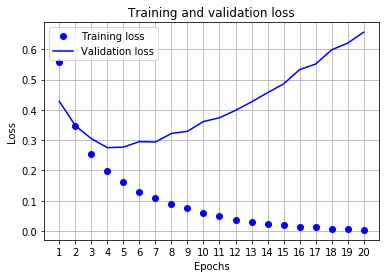

In [8]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1, 21))
plt.grid()
plt.legend()

plt.show()

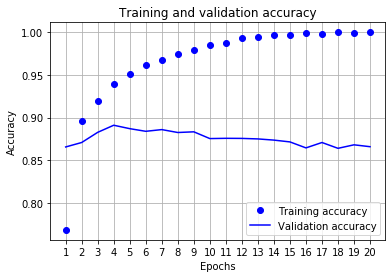

In [9]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))
plt.grid()
plt.legend()

plt.show()

## Train again & Evaluate the model

In [10]:
model = keras.models.Sequential()
model.add( keras.layers.Dense(units=16, activation='relu', input_shape=(10000,)) )
model.add( keras.layers.Dense(units=16, activation='relu') )
model.add( keras.layers.Dense(units=1, activation='sigmoid') )

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss=keras.losses.binary_crossentropy, metrics=[keras.metrics.binary_accuracy])

model.fit(x_train, y_train, epochs=4, batch_size=512)

eval_list = model.evaluate(x_test, y_test)
print('\n========== Evaluation ==========')
print(f'Final loss     : {eval_list[0]:.4f}')
print(f'Final accuracy : {eval_list[1]:.4f}')

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 2s 92us/sample - loss: 0.4762 - binary_accuracy: 0.8238
Epoch 2/4
25000/25000 [==============================] - 2s 77us/sample - loss: 0.2817 - binary_accuracy: 0.9046
Epoch 3/4
25000/25000 [==============================] - 2s 79us/sample - loss: 0.2149 - binary_accuracy: 0.9240
Epoch 4/4
25000/25000 [==============================] - 2s 80us/sample - loss: 0.2833 - binary_accuracy: 0.8873

========== Evaluation ==========
Final loss     : 0.2833
Final accuracy : 0.8873


In [11]:
model.predict(x_test)

array([[0.23833199],
       [0.9996866 ],
       [0.829383  ],
       ...,
       [0.13936867],
       [0.08771515],
       [0.53267145]], dtype=float32)